In [70]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
import scipy as sp
from sklearn.model_selection import train_test_split
'''
Genarating Dataset
'''
path = "./Data/C2T1_Train.csv"
data = pd.read_csv(path)


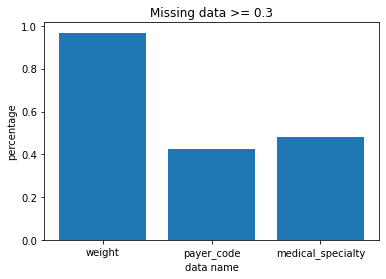

In [71]:
'''
Finding Missing Data
'''
lis = []
names = []
for col in data.columns:
    if data[col].dtype == object:
         if data[col][data[col] == '?'].count()/data.shape[0] > 0.3:
                lis.append(data[col][data[col] == '?'].count()/data.shape[0])
                names.append(col)
plt.bar(names, lis)
plt.xlabel('data name') 
plt.ylabel('percentage') 
plt.title("Missing data >= 0.3")
plt.show() 

In [72]:
data = data.drop_duplicates(subset= ['patient_nbr2'], keep = 'first') #remove duplicated patients
data = data.drop(['encounter_id2', 'patient_nbr2', 'weight', 'payer_code', 'medical_specialty', 'citoglipton', 'examide'], axis=1) #drop useless columns

In [73]:
'''
Dealing with Missing Values
'''
# label_diag_1 = data[data['diag_1'] == '?'].index.values.tolist()
# label_diag_2 = data[data['diag_2'] == '?'].index.values.tolist()
# label_diag_3 = data[data['diag_3'] == '?'].index.values.tolist()
# label_gender = data[data['gender'] == 'Unknown/Invalid'].index.values.tolist()
# labels = list(set(label_diag_1+label_diag_2+label_diag_3+label_gender))
# data = data.drop(labels=labels, axis=0)

data['diag_1'].replace(to_replace = "?", value = np.nan, inplace=True)
data['diag_2'].replace(to_replace = "?", value = np.nan, inplace=True)
data['diag_3'].replace(to_replace = "?", value = np.nan, inplace=True)
data['gender'].replace(to_replace = "Unknown/Invalid", value = np.nan, inplace=True)
data['race'].replace(to_replace = "?", value = np.nan, inplace=True)
data['admission_type_id'].replace(to_replace = [5, 6], value = [np.nan, np.nan], inplace=True)
data['discharge_disposition_id'].replace(to_replace = [18, 25, 26], value = [np.nan, np.nan, np.nan], inplace=True)
data['admission_source_id'].replace(to_replace = [9, 15, 17, 20, 21], value = [np.nan, np.nan, np.nan, np.nan, np.nan], inplace=True)

data=data.dropna()

#double check the missing data
# for col in data.columns:
#     print(col,data[col][data[col] == '?'].count())


In [75]:
'''
Feature Engineering
'''
# combining features and reduce/add columns.
data['people_hosp'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
data = data.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1)
data['total_procedures'] = data['num_lab_procedures'] + data['num_procedures'] 
# data = data.drop(['num_lab_procedures', 'num_procedures'], axis=1)


In [76]:
def modifDiag(name):
    for index, row in tqdm(data.iterrows()):
        if "V" in str(row[name]) or "E" in str(row[name]):
            data.loc[index, name] = 1
        elif 139 >= float(row[name]) >= 1:
            data.loc[index, name] = 2
        elif 239 >= float(row[name]) >= 140:
            data.loc[index, name] = 3
        elif 279 >= float(row[name]) >= 240:
            data.loc[index, name] = 4
        elif 289 >= float(row[name]) >= 280:
            data.loc[index, name] = 5
        elif 319 >= float(row[name]) >= 290:
            data.loc[index, name] = 6
        elif 359 >= float(row[name]) >= 320:
            data.loc[index, name] = 7
        elif 389 >= float(row[name]) >= 360:
            data.loc[index, name] = 8
        elif 459 >= float(row[name]) >= 390:
            data.loc[index, name] = 9
        elif 519 >= float(row[name]) >= 460:
            data.loc[index, name] = 10
        elif 579 >= float(row[name]) >= 520:
            data.loc[index, name] = 11
        elif 629 >= float(row[name]) >= 580:
            data.loc[index, name] = 12
        elif 679 >= float(row[name]) >= 630:
            data.loc[index, name] = 13
        elif 709 >= float(row[name]) >= 680:
            data.loc[index, name] = 14
        elif 739 >= float(row[name]) >= 710:
            data.loc[index, name] = 15
        elif 759 >= float(row[name]) >= 740:
            data.loc[index, name] = 16
        elif 779 >= float(row[name]) >= 760:
            data.loc[index, name] = 17
        elif 799 >= float(row[name]) >= 780:
            data.loc[index, name] = 18
        else:
            data.loc[index, name] = 19

modifDiag('diag_1')
modifDiag('diag_2')
modifDiag('diag_3')


52754it [00:07, 6927.58it/s]
52754it [00:07, 7196.51it/s]
52754it [00:07, 7302.81it/s]


In [77]:
'''
Shorten the Range
'''

data['admission_type_id'].replace(to_replace=[1,2,4], value=[2,2,2], inplace=True)
data['admission_type_id'].replace(to_replace=[3,7], value=[1,1], inplace=True)
data['admission_type_id'].replace(to_replace=8, value=0, inplace=True)


data['discharge_disposition_id'].replace(to_replace=[19,20,21,11], value=[0]*4, inplace=True)
data['discharge_disposition_id'].replace(to_replace=[1,2,6,8,13], value=[1]*5, inplace=True)
data['discharge_disposition_id'].replace(to_replace=(3,4,5,7,9,10,12,14,15,16,17,22,30), value=[2]*13, inplace=True)
data['discharge_disposition_id'].replace(to_replace=(23,24,27,29,28), value=[3]*5, inplace=True)


data['admission_source_id'].replace(to_replace=[1,2,3,11,19], value=[0,0,0,0,0], inplace=True)
data['admission_source_id'].replace(to_replace=(4,5,6,10,18,22,25,26), value=[1]*8, inplace=True)
data['admission_source_id'].replace(to_replace=(13,14,23,24), value=[2]*4, inplace=True)
data['admission_source_id'].replace(to_replace=(7,8), value=[3]*2, inplace=True)

data['people_hosp'].replace(to_replace=[i for i in range(1, 11)], value=[1]*10, inplace=True)
data['people_hosp'].replace(to_replace=[i for i in range(11, 50)], value=[2]*39, inplace=True)


In [28]:
def rerange(name):
    avgVal = data[name].sum()/len(data[name])
    for index, row in tqdm(data.iterrows()):
        if avgVal/2 > float(row[name]) >= 0:
            data.loc[index, name] = 0
        elif avgVal > float(row[name]) >= avgVal/2:
            data.loc[index, name] = 1
        elif 3*avgVal/2 > float(row[name]) >= avgVal:
            data.loc[index, name] = 2
        else:
            data.loc[index, name] = 3
for col in ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'total_procedures', 
            'number_diagnoses']:
    rerange(col)

52754it [00:06, 8429.18it/s]
52754it [00:06, 8439.92it/s]
52754it [00:06, 8563.41it/s]
52754it [00:06, 8451.76it/s]
52754it [00:06, 8570.62it/s]
52754it [00:06, 8466.43it/s]


In [78]:
'''
Tokenization
'''
data['change'].replace(to_replace=('No','Ch'), value=(0, 1), inplace=True)
data['gender'].replace(to_replace=('Female', 'Male'), value=(0, 1), inplace=True) 
data['diabetesMed'].replace(to_replace=('No','Yes'), value=(0, 1), inplace=True)
indexName = data.columns.tolist()
data.replace(to_replace=('No','Steady','Up', 'Down'), value=(0, 0, 1, 1), inplace=True)
data['A1Cresult'].replace(to_replace=('None', '>7', '>8', 'Norm'), value=(-999, 1, 1, 0), inplace=True)
data['max_glu_serum'].replace(to_replace=('None', '>300', 'Norm', '>200'), value=(-999, 1, 0, 1), inplace=True)
data.replace(to_replace=('[90-100)', '[80-90)', '[40-50)', '[50-60)', '[60-70)', '[70-80)',
       '[20-30)', '[10-20)', '[30-40)', '[0-10)'), value=(2, 2, 2, 1, 1, 1, 1, 0, 0, 0), inplace=True)
data['readmitted'].replace(to_replace=('NO','>30','<30'), value=(0, 1, 1), inplace=True) 
# types = tuple(data['race'].unique())
# data['race'].replace(to_replace = types, value = tuple([i for i in range(len(types))]), inplace=True)
data['severity'] = 0
for medic in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']:
    data['severity'] = data['severity'] + data[medic] 



In [48]:
#check range
for col in data.columns:
    print(col,data[col].min(), data[col].max())

race AfricanAmerican Other
gender 0 1
age 0 2
admission_type_id 0.0 2.0
discharge_disposition_id 0.0 3.0
admission_source_id 0.0 3.0
time_in_hospital 1 14
num_lab_procedures 1 132
num_procedures 0 6
num_medications 1 81
diag_1 1 19
diag_2 1 19
diag_3 1 19
number_diagnoses 3 16
max_glu_serum -999 1
A1Cresult -999 1
metformin 0 1
repaglinide 0 1
nateglinide 0 1
chlorpropamide 0 1
glimepiride 0 1
acetohexamide 0 0
glipizide 0 1
glyburide 0 1
tolbutamide 0 0
pioglitazone 0 1
rosiglitazone 0 1
acarbose 0 1
miglitol 0 1
troglitazone 0 0
tolazamide 0 0
insulin 0 1
glyburide-metformin 0 1
glipizide-metformin 0 0
glimepiride-pioglitazone 0 0
metformin-rosiglitazone 0 0
metformin-pioglitazone 0 0
change 0 1
diabetesMed 0 1
readmitted 0 1
people_hosp 0 2
total_procedures 1 135
severity 0 4


In [80]:

'''
Dummies
'''
data = pd.get_dummies(data, columns=['race'], drop_first = True)


In [51]:
# interactionterms = [('num_medications','time_in_hospital'),
# ('num_medications','num_procedures'),
# ('time_in_hospital','num_lab_procedures'),
# ('num_medications','num_lab_procedures'),
# ('num_medications','number_diagnoses'),
# ('age','number_diagnoses'),
# ('change','num_medications'),
# ('number_diagnoses','time_in_hospital'),
# ('num_medications','severity')]
# for inter in interactionterms:
#     name = inter[0] + '|' + inter[1]
#     data[name] = data[inter[0]] * data[inter[1]]


In [83]:
'''
Using Log Transform to remove Skewness.
'''
features = list(set(list(data._get_numeric_data().columns))- {'readmitted', 'admission_type_id', 'discharge_disposition_id', 'max_glu_serum', 'admission_source_id', 'A1Cresult'})
for i in features:
    skewval = data[i].skew()
    kurtval = data[i].kurtosis()    
    if (abs(skewval) > 1) or (abs(kurtval) > 1):
        if len(data[data[i] == 0])/len(data) <= 0.02:
            data[i] = np.log(data[i])
        else:
            data[i] = np.log1p(data[i])



In [84]:
'''
Standarization
'''
indexName = list(set(list(data._get_numeric_data().columns))- {'readmitted', 'admission_type_id', 'discharge_disposition_id', 'max_glu_serum', 'admission_source_id', 'A1Cresult'})
for col in indexName:
    if col != "readmitted":
        
        data[col] = preprocessing.StandardScaler().fit_transform(data[[col]].values)
        
# data = data[(np.abs(sp.stats.zscore(data[features])) < 3).all(axis=1)]
        

In [87]:
'''
Spliting Data
'''
features = list(set(list(data.columns))- {'readmitted'})
X = data[features]
y = data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
'''
使用Decision Tree Model
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

Accuracy is 0.56
Precision is 0.44
Recall is 0.41


In [98]:
'''
使用 Decision Tree Model
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
model = tf.keras.models.Sequential()
model.add(Dense(100, input_shape = (45,), activation='relu')) 
model.add(Dense(100, activation='tanh')) #hidden sizes
model.add(Dropout(0.45))
model.add(Dense(10, activation='softmax'))

#optimizer

adam = Adam()


model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = adam, metrics = ['accuracy'])
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1319/1319 [==============================] - 3s 2ms/step - loss: 0.7527 - accuracy: 0.5611
Epoch 2/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6787 - accuracy: 0.5915
Epoch 3/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6787 - accuracy: 0.5931
Epoch 4/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6787 - accuracy: 0.5946
Epoch 5/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6784 - accuracy: 0.5923
Epoch 6/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6787 - accuracy: 0.5913
Epoch 7/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6784 - accuracy: 0.5922
Epoch 8/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6783 - accuracy: 0.5931
Epoch 9/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6783 - accuracy: 0.5917
Epoch 10/10
1319/1319 [==============================] - 2s 2ms/step - loss: 0.679

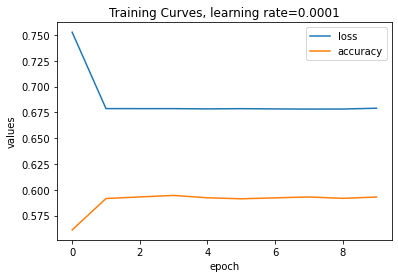

In [99]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.ylabel("values")
plt.title("Training Curves, learning rate=0.0001")
# plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [100]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_train = np.argmax(y_pred_train, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
print("########## Training Dataset ###########")
print("Accu.:", accuracy_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train, average="macro"))
print("Precision:", precision_score(y_train, y_pred_train, average="macro"))
print("F1:", f1_score(y_train, y_pred_train, average="macro"))

print("########## Testing Dataset ###########")
print("Accu.:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("F1:", f1_score(y_test, y_pred, average="macro"))

########## Training Dataset ###########
Accu.: 0.5990332440821743
Recall: 0.5
Precision: 0.29951662204108714
F1: 0.37462213265366606
########## Testing Dataset ###########
Accu.: 0.6015543550374373
Recall: 0.5
Precision: 0.30077717751871863
F1: 0.3756065806604332


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
